In [12]:

# load dataset
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def funForcm (filename,num):

  dataframe = pandas.read_table(filename)
  data = dataframe.drop("No.", axis=1)
  data = data.drop("StdPageRank", axis=1)
  data = data.drop("VarPageRank", axis=1)
  dataset = data.values



# split into input (X) and output (Y) variables

#l = 36893 
  l = num
  X = dataset[:,0:]
# Y = dataset[100:200, 1:10]
  # for col in data.columns: 
  #     print(col)
# print(X.shape)
  labels = []
  for i in range (0,l):
    if X[i][9] == True:
      labels.append(0)
    else:
      labels.append(1)

  features = X[0:l,0:9]

  # print(labels.count(0))
  # print(labels.count(1))
  # print(features)

  #print(features.shape)
# df = dataframe.corr()

# #print(df)

# corrMatrix = data.corr()
# print(corrMatrix)

# sn.heatmap(corrMatrix, annot=True, fmt = ".1g")
# plt.show()




# Split our data
  train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
  gnb = nb.MultinomialNB()

  # Train our classifier
  model = gnb.fit(train, train_labels)
  preds = gnb.predict(test)
  
  # Evaluate accurac
  print(accuracy_score(test_labels, preds))

  cm = confusion_matrix(test_labels, preds)

  return cm

print("Diagnostic")
cm_diag = funForcm('/content/newmakeDiagnostic_attack_GraphFeatures.txt',4036)
cm_diag= cm_diag.T
print(cm_diag)
print("Dos")
cm_dos=funForcm('/content/dosattack30msgpergraph_attack_opelastra_ftrs.txt',4138)
cm_dos = cm_dos.T
print(cm_dos)
print("canid")
cm_canid= funForcm('/content/fuzzingcanid30msgpergraph_attack_opelastra_ftrs.txt',4036)
cm_canid = cm_canid.T
print(cm_canid)
print("payload")
cm_pay= funForcm('/content/fuzzingpayload30msgpergraph_attack_opelastra_ftrs.txt',4045)
cm_pay = cm_pay.T
print(cm_pay)
print("replay")
cm_replay=funForcm('/content/newmakeReplay_attack_GraphFeatures (1).txt',4035)
cm_replay = cm_replay.T
print(cm_replay)
print("Suspension")
cm_sus=funForcm('/content/s_attack_GraphFeatures.txt',4033)
cm_sus = cm_sus.T
print(cm_sus)
print("Mixed")
cm_mixed = funForcm('/content/for_all_mixed.txt',37776)
cm_mixed = cm_mixed.T
print(cm_mixed.T)
print("overall")
cm_overall = cm_diag + cm_dos + cm_canid + cm_pay + cm_replay + cm_sus + cm_mixed
print((cm_overall[0][0]+cm_overall[1][1]) / (cm_overall[0][0]+cm_overall[1][1] + cm_overall[0][1] +cm_overall[1][0]) )
print(cm_overall)

Diagnostic
0.9977477477477478
[[1329    3]
 [   0    0]]
Dos
1.0
[[1306    0]
 [   0   60]]
canid
1.0
[[1329    0]
 [   0    3]]
payload
1.0
[[1328    0]
 [   0    7]]
replay
0.9977477477477478
[[1328    3]
 [   0    1]]
Suspension
0.9624342599549212
[[1265   50]
 [   0   16]]
Mixed
0.9939841180717093
[[12319     0]
 [   75    73]]
overall
0.993608197121249
[[20204   131]
 [    0   160]]


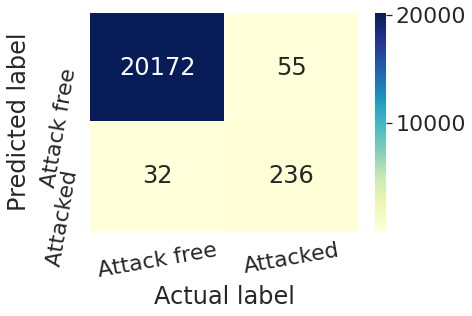

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline

def produce_matrix(cm_name, name):

  cm_matrix = pd.DataFrame(data=cm_name, columns=['Attack free', 'Attacked'], 
                                  index=['   Attack free ', ' Attacked'])
  sns.set(font_scale=2)
  sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
  # plt.title("Confusion Matrix for All attack")
  plt.xlabel("Actual label")
  plt.ylabel("Predicted label")
  plt.yticks(rotation = 80)
  plt.xticks(rotation = 10)
  plt.rcParams['font.size'] = 4
  plt.rcParams['figure.figsize'] = (1, 1)   
  plt.savefig('confusion_opel_'+str(name)+'.pdf', bbox_inches = "tight")
  plt.savefig('confusion_opel_'+str(name)+'.png', bbox_inches = "tight")
  plt.savefig('confusion_opel_'+str(name)+'.svg', bbox_inches = "tight")


#produce_matrix(cm_diag,"diagnostic")
#produce_matrix(cm_dos,"dos")
#produce_matrix(cm_canid,"can_id")
#produce_matrix(cm_pay,"fuzzy_payload")
#produce_matrix(cm_replay,"replay")
#produce_matrix(cm_sus,"Suspenstion")
#produce_matrix(cm_mixed,"Mixed")
produce_matrix(cm_overall,"Overall")



In [13]:
def fun(cm):
  tp = cm[0][0]
  fn = cm[0][1]
  fp = cm[1][0]
  tn = cm[1][1]
  pr = tp/(tp+fp)
  re = tp/(tp+fn)
  f1 = 2*pr*re/ (pr+re)
  print((tp+tn)/(tp+tn+fp+fn))
  print(str(pr)+" "+str(re)+" "+str(f1))

print("diagnostic")
fun(cm_diag)
print("dos")
fun(cm_dos)
print("fuzzy_candid")
fun(cm_canid)
print("fuzzy_payload")
fun(cm_pay)
print("replay")
fun(cm_replay)
print("suspension")
fun(cm_sus) 
print("complete")
fun(cm_mixed)

print("overall")
fun(cm_overall)


diagnostic
0.9977477477477478
1.0 0.9977477477477478 0.9988726042841037
dos
1.0
1.0 1.0 1.0
fuzzy_candid
1.0
1.0 1.0 1.0
fuzzy_payload
1.0
1.0 1.0 1.0
replay
0.9977477477477478
1.0 0.9977460555972952 0.9988717562993606
suspension
0.9624342599549212
1.0 0.9619771863117871 0.9806201550387598
complete
0.9939841180717093
1.0 0.9939486848475069 0.9969651600372275
overall
0.993608197121249
1.0 0.9935579050897467 0.9967685438713337
